In [88]:
import pandas as pd
import numpy as np

#standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)
pd.set_option("max_rows",3000)
print("setup complete")

# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sb

setup complete


In [2]:
# importing the data
test = pd.read_csv("test.csv", index_col = "Id")
train = pd.read_csv("train.csv", index_col = "Id")

# getting the dimensions of the data
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [87]:
# merging the data
data = pd.concat([train,test],join = "outer")
display(data)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [5]:
data.describe(include = "all") # missing values found

1stFlrSF     2ndFlrSF    3SsnPorch Alley  BedroomAbvGr BldgType  \
count   2919.000000  2919.000000  2919.000000   198   2919.000000     2919   
unique          NaN          NaN          NaN     2           NaN        5   
top             NaN          NaN          NaN  Grvl           NaN     1Fam   
freq            NaN          NaN          NaN   120           NaN     2425   
mean    1159.581706   336.483727     2.602261   NaN      2.860226      NaN   
std      392.362079   428.701456    25.188169   NaN      0.822693      NaN   
min      334.000000     0.000000     0.000000   NaN      0.000000      NaN   
25%      876.000000     0.000000     0.000000   NaN      2.000000      NaN   
50%     1082.000000     0.000000     0.000000   NaN      3.000000      NaN   
75%     1387.500000   704.000000     0.000000   NaN      3.000000      NaN   
max     5095.000000  2065.000000   508.000000   NaN      8.000000      NaN   

       BsmtCond BsmtExposure   BsmtFinSF1   BsmtFinSF2     ...      SaleType  \
count      2837         2837  2918.000000  2918.000000     ...          2918   
unique        4            4          NaN          NaN     ...             9   
top          TA           No          NaN          NaN     ...            WD   
freq       2606         1904          NaN          NaN     ...          2525   
mean        NaN          NaN   441.423235    49.582248     ...           NaN   
std         NaN          NaN   455.610826   169.205611     ...           NaN   
min         NaN          NaN     0.000000     0.000000     ...           NaN   
25%         NaN          NaN     0.000000     0.000000     ...           NaN   
50%         NaN          NaN   368.500000     0.000000     ...           NaN   
75%         NaN          NaN   733.000000     0.000000     ...           NaN   
max         NaN          NaN  5644.000000  1526.000000     ...           NaN   

        ScreenPorch  Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  \
count   2919.000000    2919   2919.000000  2918.000000       2917   
unique          NaN       2           NaN          NaN          2   
top             NaN    Pave           NaN          NaN     AllPub   
freq            NaN    2907           NaN          NaN       2916   
mean      16.062350     NaN      6.451524  1051.777587        NaN   
std       56.184365     NaN      1.569379   440.766258        NaN   
min        0.000000     NaN      2.000000     0.000000        NaN   
25%        0.000000     NaN      5.000000   793.000000        NaN   
50%        0.000000     NaN      6.000000   989.500000        NaN   
75%        0.000000     NaN      7.000000  1302.000000        NaN   
max      576.000000     NaN     15.000000  6110.000000        NaN   

         WoodDeckSF    YearBuilt YearRemodAdd       YrSold  
count   2919.000000  2919.000000  2919.000000  2919.000000  
unique          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN  
mean      93.709832  1971.312778  1984.264474  2007.792737  
std      126.526589    30.291442    20.894344     1.314964  
min        0.000000  1872.000000  1950.000000  2006.000000  
25%        0.000000  1953.500000  1965.000000  2007.000000  
50%        0.000000  1973.000000  1993.000000  2008.000000  
75%      168.000000  2001.000000  2004.000000  2009.000000  
max     1424.000000  2010.000000  2010.000000  2010.000000  

[11 rows x 80 columns]

In [5]:
#Extracing the column names having missing values
(((data.isnull().sum())/len(data))*100).sort_values(ascending = False) 
#PoolQC           99.657417
#MiscFeature      96.402878
#Alley            93.216855
# Fence            80.438506

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
SalePrice        49.982871
FireplaceQu      48.646797
LotFrontage      16.649538
GarageQual        5.447071
GarageYrBlt       5.447071
GarageFinish      5.447071
GarageCond        5.447071
GarageType        5.378554
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
BsmtHalfBath      0.068517
Utilities         0.068517
Functional        0.068517
BsmtFullBath      0.068517
Electrical        0.034258
Exterior2nd       0.034258
KitchenQual       0.034258
GarageCars        0.034258
Exterior1st       0.034258
GarageArea        0.034258
TotalBsmtSF       0.034258
BsmtUnfSF         0.034258
BsmtFinSF2        0.034258
BsmtFinSF1        0.034258
SaleType          0.034258
Condition2        0.000000
FullBath          0.000000
2

In [5]:
# columns having more than 70% null values are being removed since they do not have enough information 
data1 = data.drop(["PoolQC","MiscFeature","Alley","Fence"], axis = 1)
display(data1.columns)


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

In [7]:
# treating the numerical rows having missing values
# LotFrontage 
#data1["LotFrontage"] = data.LotFrontage.fillna(data["LotFrontage"].mean())
#data1.loc[pd.isnull(data1['LotFrontage']),['LotFrontage']]=data1["LotFrontage"].interpolate()
data1["LotFrontage"] = data.LotFrontage.fillna(data["LotFrontage"].interpolate())
data1.LotFrontage.isnull().sum()


0

In [11]:
# deleting the rows having missing values
#data1 = data1.dropna(axis = 0)
#print(data1.isnull().sum())

In [13]:
data1.shape

(2919, 76)

# univariate analyses

Text(0.5, 0, 'LotShape')

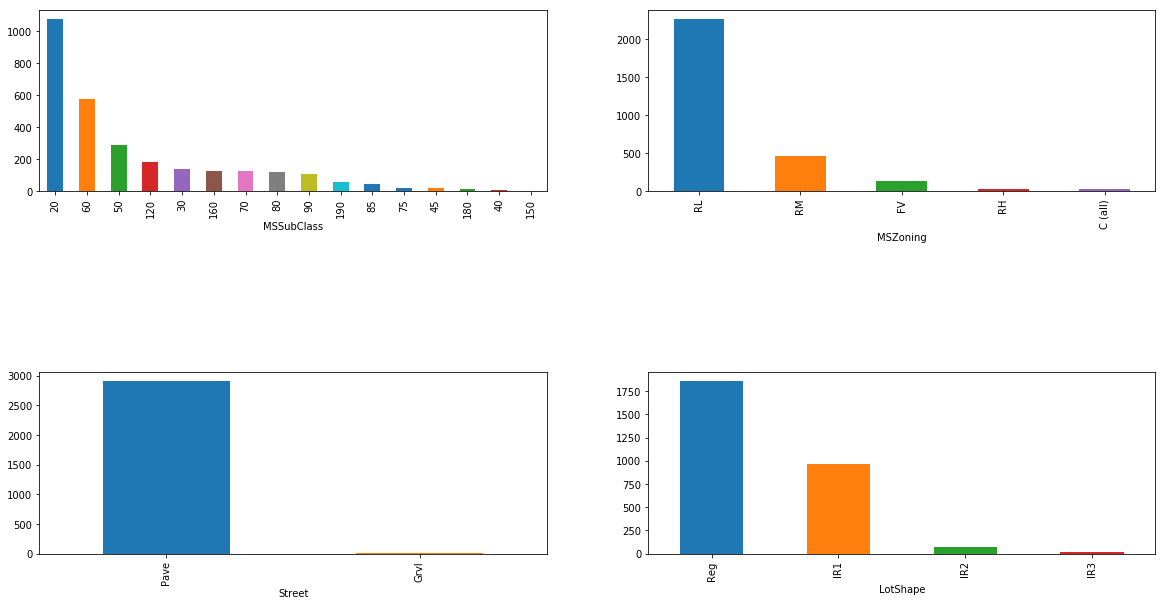

In [26]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
data1["MSSubClass"].value_counts().plot(kind="bar")
plt.xlabel("MSSubClass")

plt.subplot(222)
data1["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("MSZoning")

plt.subplot(223)
data1["Street"].value_counts().plot(kind="bar")
plt.xlabel("Street")

plt.subplot(224)
data1["LotShape"].value_counts().plot(kind="bar")
plt.xlabel("LotShape")

Text(0.5, 0, 'Utilities')

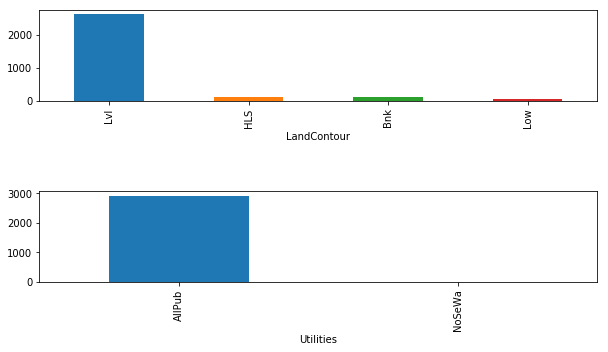

In [27]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)
plt.subplot(211)
data1["LandContour"].value_counts().plot(kind="bar")
plt.xlabel("LandContour")

plt.subplot(212)
data1["Utilities"].value_counts().plot(kind="bar")
plt.xlabel("Utilities")

Text(0.5, 0, 'Condition1')

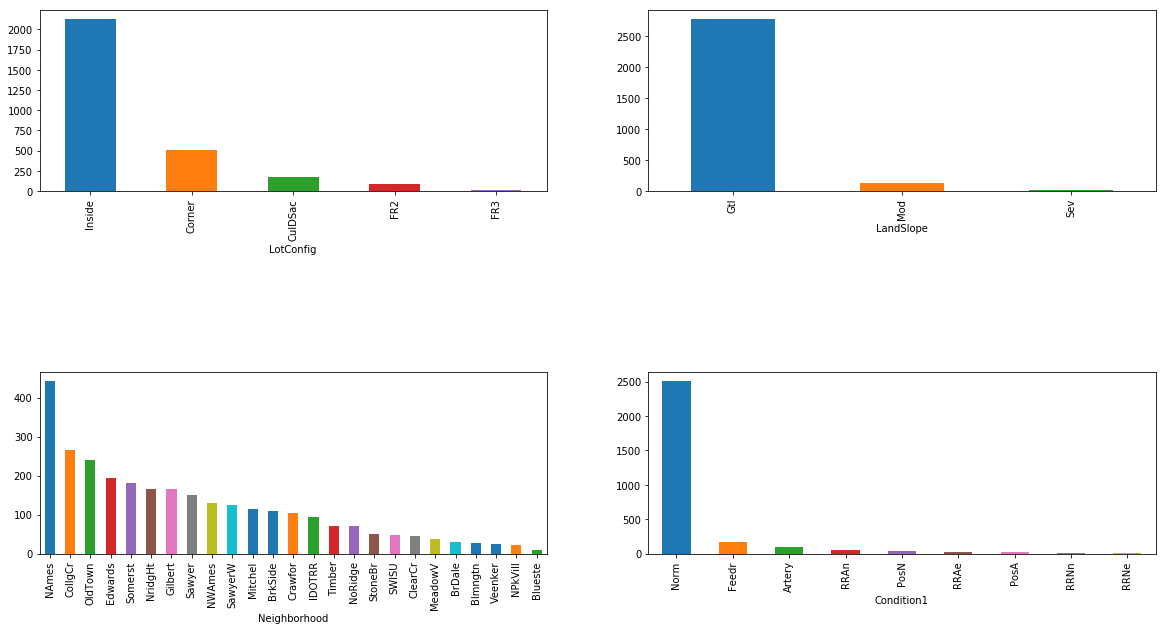

In [28]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["LotConfig"].value_counts().plot(kind="bar")
plt.xlabel("LotConfig")

plt.subplot(222)
data1["LandSlope"].value_counts().plot(kind="bar")
plt.xlabel("LandSlope")

plt.subplot(223)
data1["Neighborhood"].value_counts().plot(kind="bar")
plt.xlabel("Neighborhood")

plt.subplot(224)
data1["Condition1"].value_counts().plot(kind="bar")
plt.xlabel("Condition1")

Text(0.5, 0, 'BldgType')

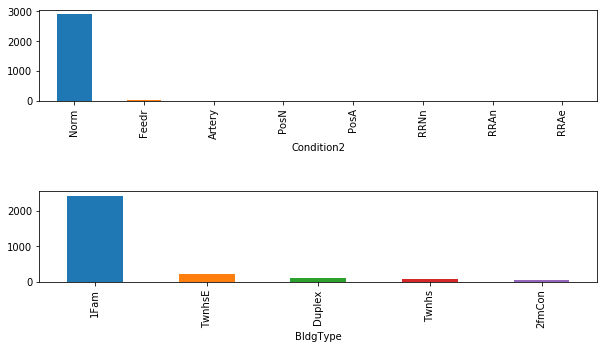

In [29]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)

plt.subplot(211)
data1["Condition2"].value_counts().plot(kind="bar")
plt.xlabel("Condition2")

plt.subplot(212)
data1["BldgType"].value_counts().plot(kind="bar")
plt.xlabel("BldgType")

Text(0.5, 0, 'RoofMatl')

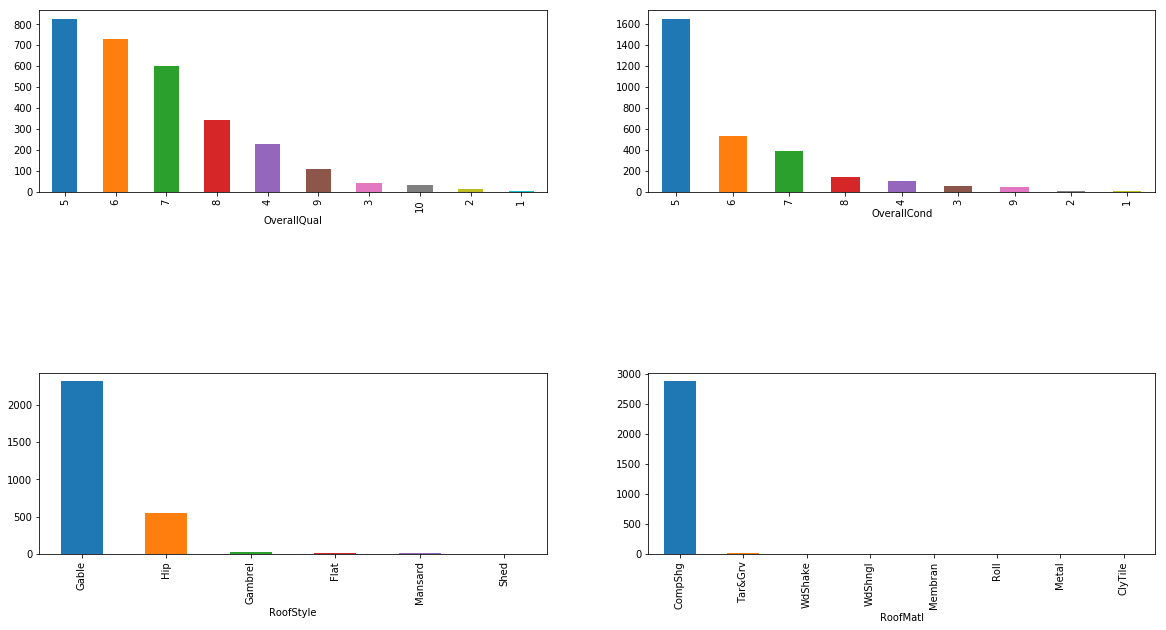

In [30]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["OverallQual"].value_counts().plot(kind="bar")
plt.xlabel("OverallQual")

plt.subplot(222)
data1["OverallCond"].value_counts().plot(kind="bar")
plt.xlabel("OverallCond")

plt.subplot(223)
data1["RoofStyle"].value_counts().plot(kind="bar")
plt.xlabel("RoofStyle")

plt.subplot(224)
data1["RoofMatl"].value_counts().plot(kind="bar")
plt.xlabel("RoofMatl")

Text(0.5, 0, 'ExterQual')

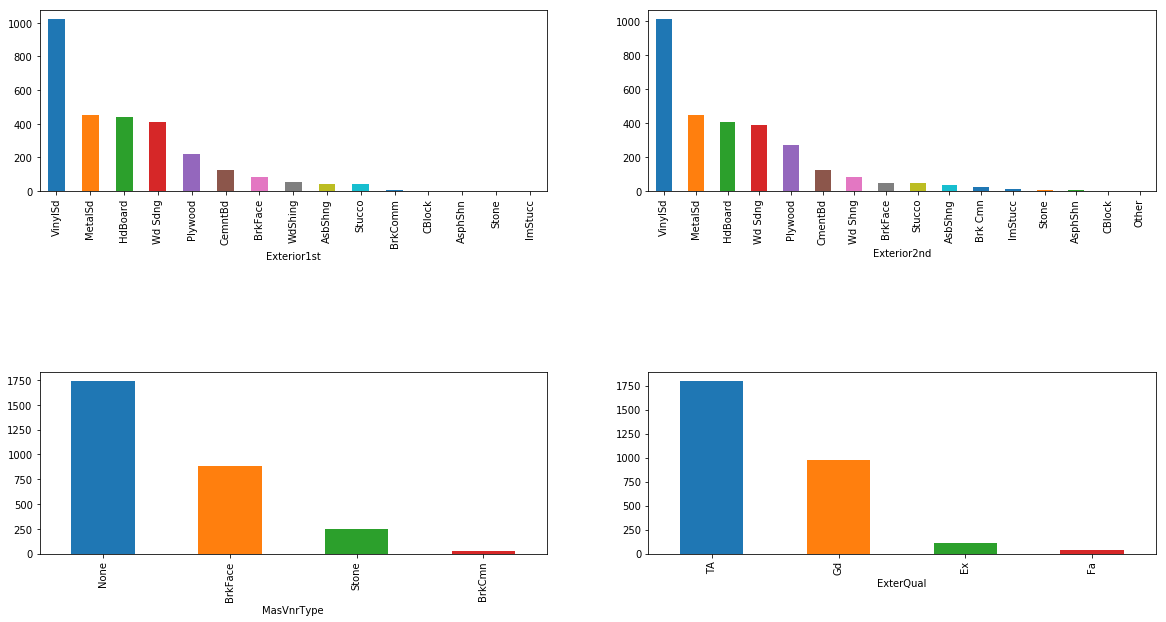

In [31]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["Exterior1st"].value_counts().plot(kind="bar")
plt.xlabel("Exterior1st")

plt.subplot(222)
data1["Exterior2nd"].value_counts().plot(kind="bar")
plt.xlabel("Exterior2nd")

plt.subplot(223)
data1["MasVnrType"].value_counts().plot(kind="bar")
plt.xlabel("MasVnrType")

plt.subplot(224)
data1["ExterQual"].value_counts().plot(kind="bar")
plt.xlabel("ExterQual")

Text(0.5, 0, 'BsmtCond')

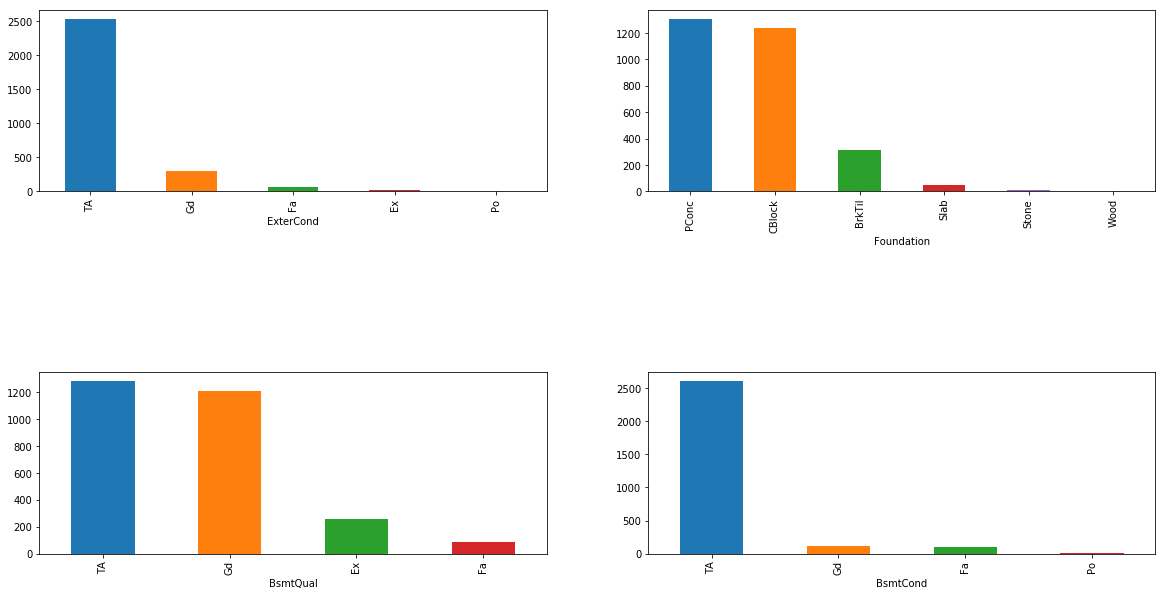

In [32]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["ExterCond"].value_counts().plot(kind="bar")
plt.xlabel("ExterCond")

plt.subplot(222)
data1["Foundation"].value_counts().plot(kind="bar")
plt.xlabel("Foundation")

plt.subplot(223)
data1["BsmtQual"].value_counts().plot(kind="bar")
plt.xlabel("BsmtQual")

plt.subplot(224)
data1["BsmtCond"].value_counts().plot(kind="bar")
plt.xlabel("BsmtCond")

Text(0.5, 0, 'Heating')

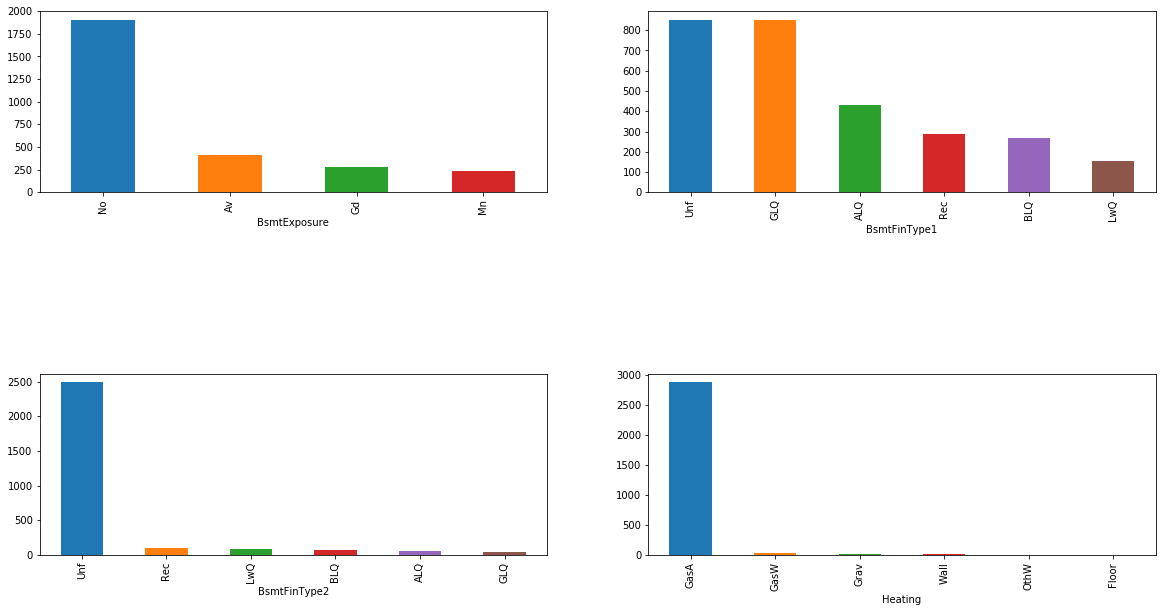

In [33]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["BsmtExposure"].value_counts().plot(kind="bar")
plt.xlabel("BsmtExposure")
#rename NO and No

plt.subplot(222)
data1["BsmtFinType1"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFinType1")
#rename NO

plt.subplot(223)
data1["BsmtFinType2"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFinType2")
#rename NO

plt.subplot(224)
data1["Heating"].value_counts().plot(kind="bar")
plt.xlabel("Heating")

Text(0.5, 0, 'HeatingQC')

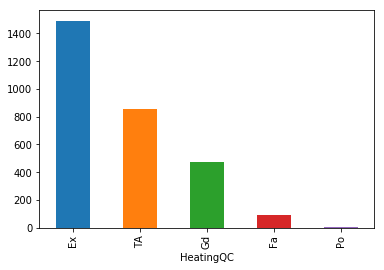

In [21]:
data1["HeatingQC"].value_counts().plot(kind="bar")
plt.xlabel("HeatingQC")

Text(0.5, 0, 'BsmtHalfBath')

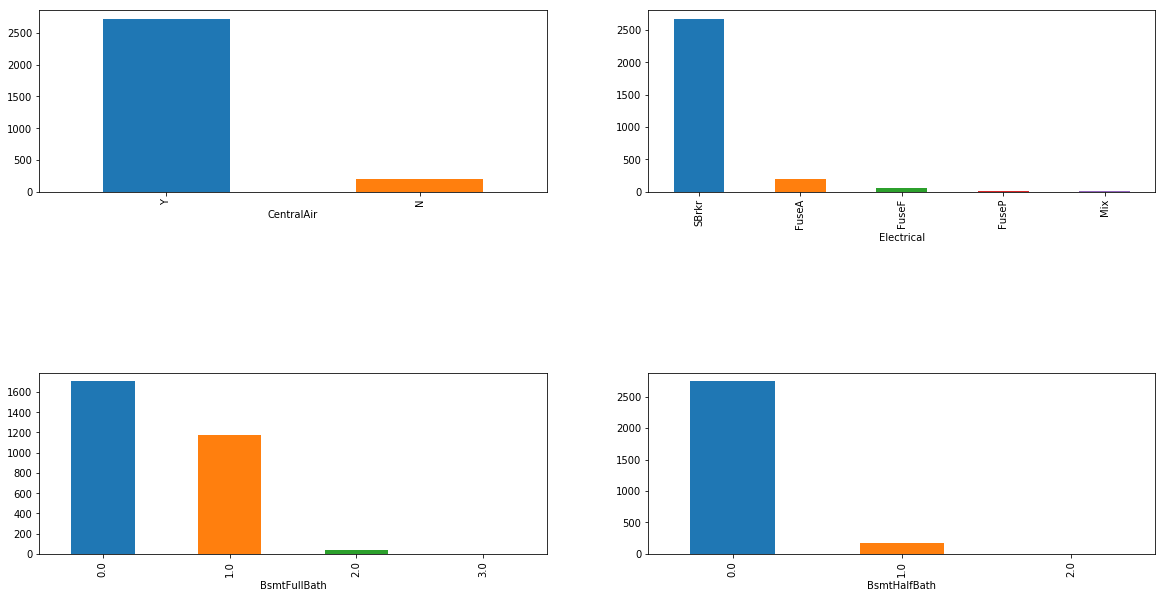

In [34]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["CentralAir"].value_counts().plot(kind="bar")
plt.xlabel("CentralAir")

plt.subplot(222)
data1["Electrical"].value_counts().plot(kind="bar")
plt.xlabel("Electrical")

plt.subplot(223)
data1["BsmtFullBath"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFullBath")

plt.subplot(224)
data1["BsmtHalfBath"].value_counts().plot(kind="bar")
plt.xlabel("BsmtHalfBath")

Text(0.5, 0, 'KitchenAbvGr')

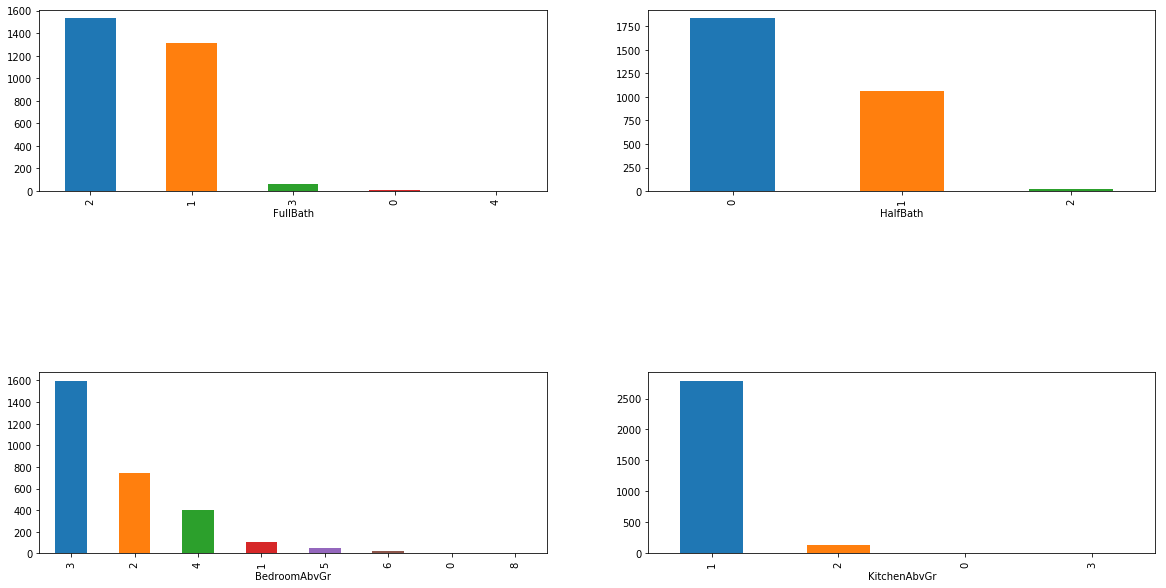

In [35]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["FullBath"].value_counts().plot(kind="bar")
plt.xlabel("FullBath")

plt.subplot(222)
data1["HalfBath"].value_counts().plot(kind="bar")
plt.xlabel("HalfBath")

plt.subplot(223)
data1["BedroomAbvGr"].value_counts().plot(kind="bar")
plt.xlabel("BedroomAbvGr")

plt.subplot(224)
data1["KitchenAbvGr"].value_counts().plot(kind="bar")
plt.xlabel("KitchenAbvGr")

Text(0.5, 0, 'Fireplaces')

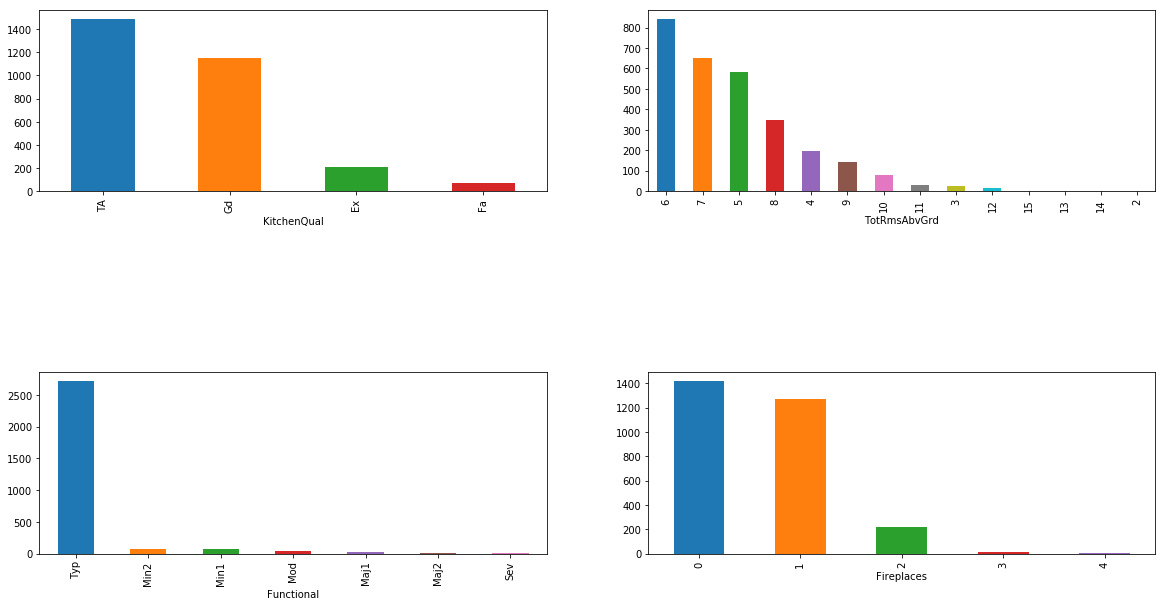

In [36]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["KitchenQual"].value_counts().plot(kind="bar")
plt.xlabel("KitchenQual")

plt.subplot(222)
data1["TotRmsAbvGrd"].value_counts().plot(kind="bar")
plt.xlabel("TotRmsAbvGrd")

plt.subplot(223)
data1["Functional"].value_counts().plot(kind="bar")
plt.xlabel("Functional")

plt.subplot(224)
data1["Fireplaces"].value_counts().plot(kind="bar")
plt.xlabel("Fireplaces")

Text(0.5, 0, 'GarageFinish')

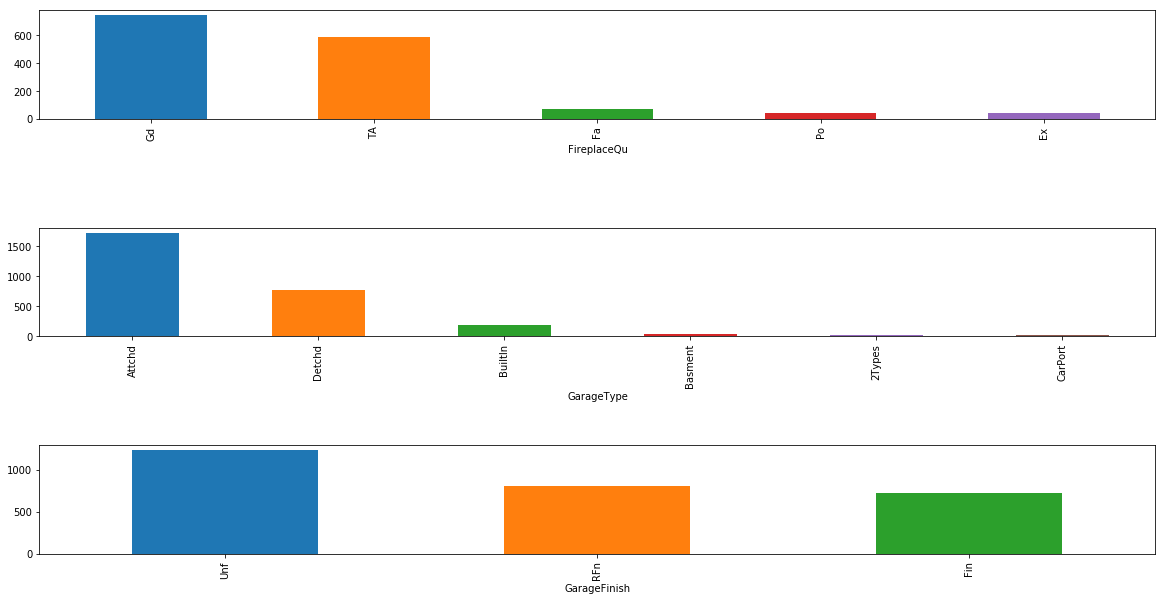

In [20]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(311)
data1["FireplaceQu"].value_counts().plot(kind="bar")
plt.xlabel("FireplaceQu")
#rename NO

plt.subplot(312)
data1["GarageType"].value_counts().plot(kind="bar")
plt.xlabel("GarageType")
#rename NO

plt.subplot(313)
data1["GarageFinish"].value_counts().plot(kind="bar")
plt.xlabel("GarageFinish")
#rename NO

Text(0.5, 0, 'GarageYrBlt (from 1900s)')

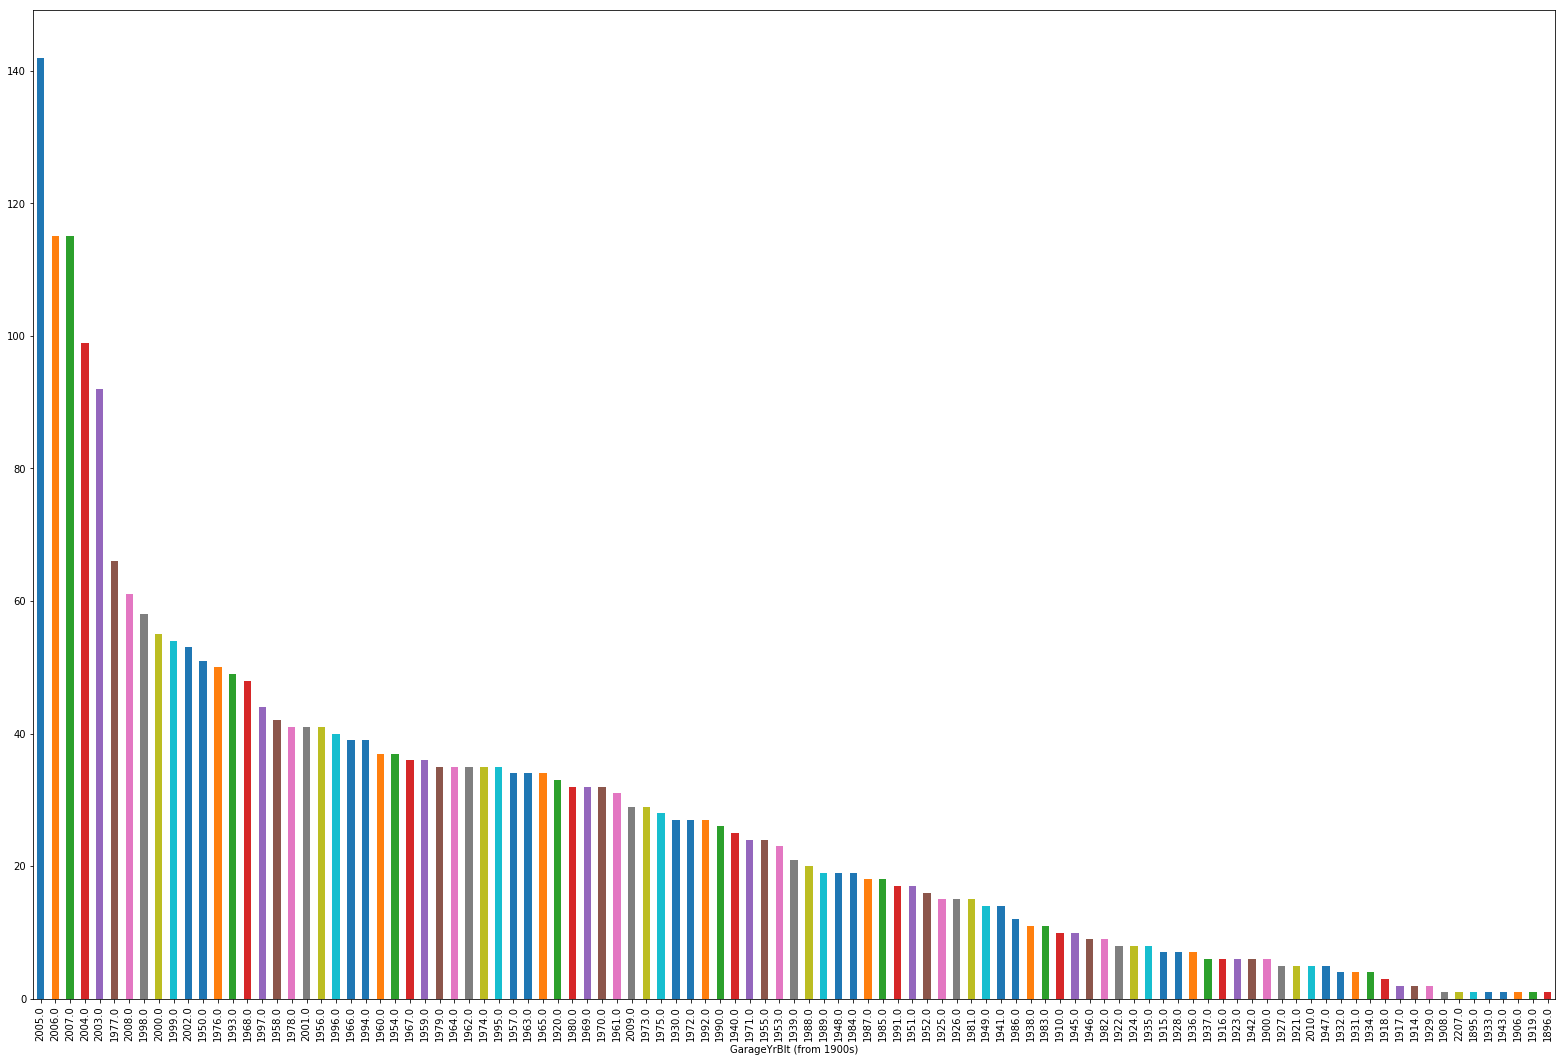

In [53]:
plt.figure(figsize=(60,40))

plt.subplot(224)
data1["GarageYrBlt"].value_counts().plot(kind="bar")
plt.xlabel("GarageYrBlt (from 1900s)")

Text(0.5, 0, 'PavedDrive')

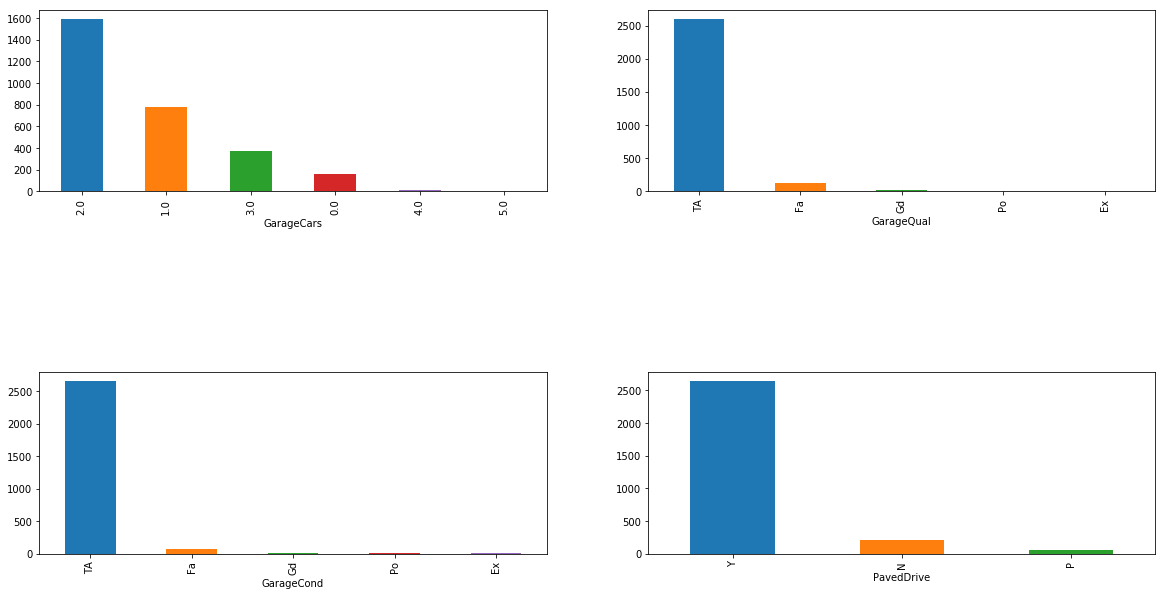

In [40]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
data1["GarageCars"].value_counts().plot(kind="bar")
plt.xlabel("GarageCars")
#rename 0

plt.subplot(222)
data1["GarageQual"].value_counts().plot(kind="bar")
plt.xlabel("GarageQual")
#rename NO

plt.subplot(223)
data1["GarageCond"].value_counts().plot(kind="bar")
plt.xlabel("GarageCond")
#rename NO

plt.subplot(224)
data1["PavedDrive"].value_counts().plot(kind="bar")
plt.xlabel("PavedDrive")

Text(0.5, 0, 'SaleCondition')

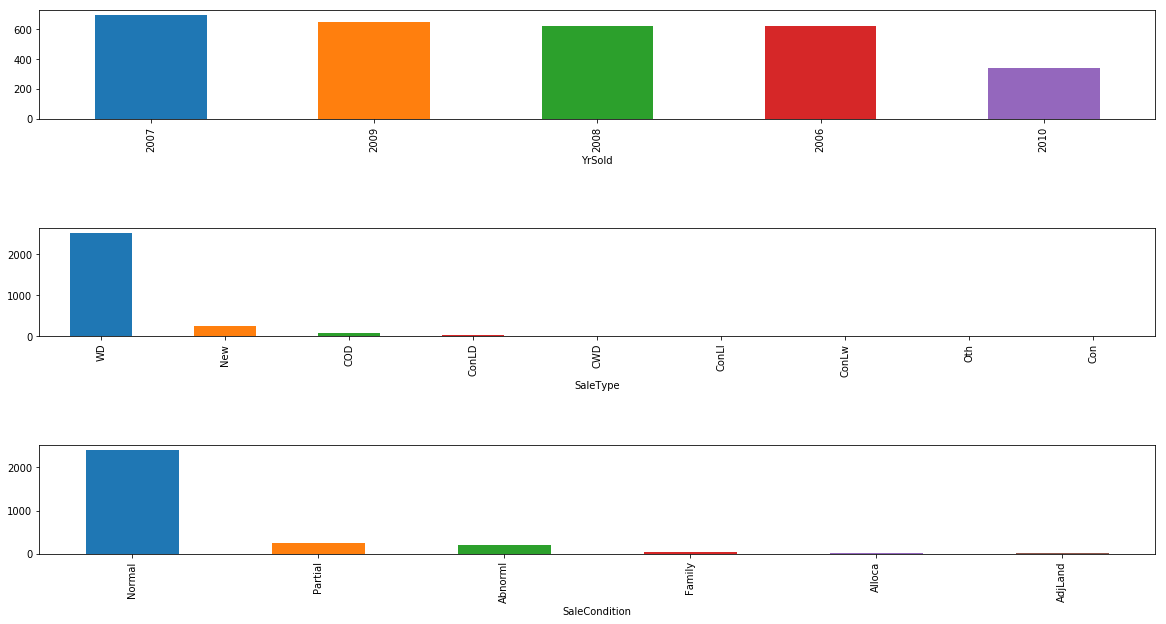

In [41]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(311)
data1["YrSold"].value_counts().plot(kind="bar")
plt.xlabel("YrSold")

plt.subplot(312)
data1["SaleType"].value_counts().plot(kind="bar")
plt.xlabel("SaleType")
#rename othr

plt.subplot(313)
data1["SaleCondition"].value_counts().plot(kind="bar")
plt.xlabel("SaleCondition")

Text(0.5, 0, 'BsmtFinSF2')

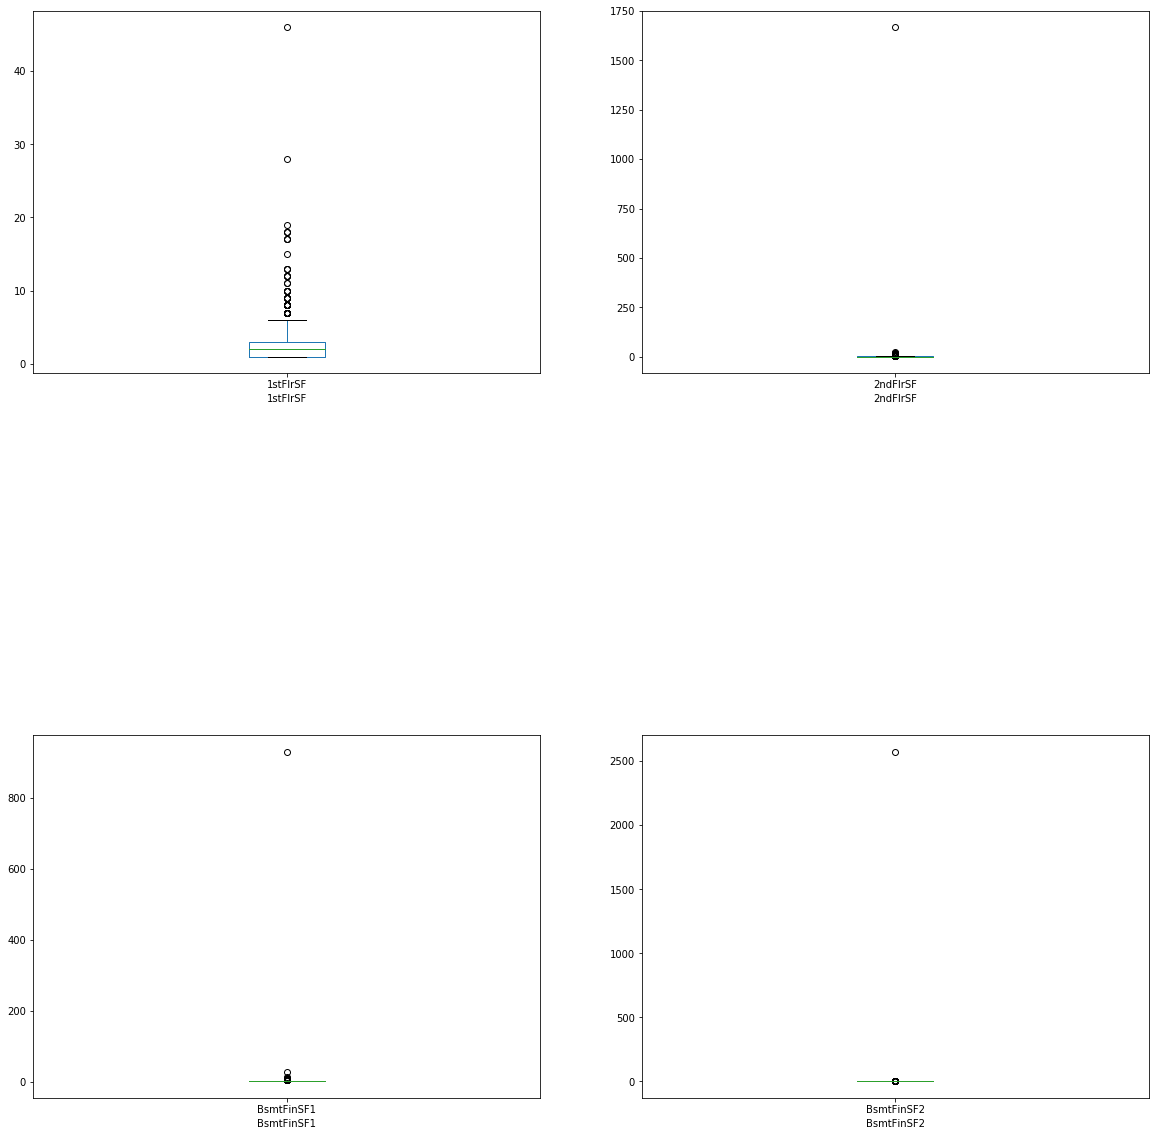

In [48]:
plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace =1)

plt.subplot(221)
data1["1stFlrSF"].value_counts().plot(kind = "box")
plt.xlabel("1stFlrSF")

plt.subplot(222)
data1["2ndFlrSF"].value_counts().plot(kind = "box")
plt.xlabel("2ndFlrSF")

plt.subplot(223)
data1["BsmtFinSF1"].value_counts().plot(kind = "box")
plt.xlabel("BsmtFinSF1")

plt.subplot(224)
data1["BsmtFinSF2"].value_counts().plot(kind = "box")
plt.xlabel("BsmtFinSF2")

Text(0.5, 0, 'GarageArea')

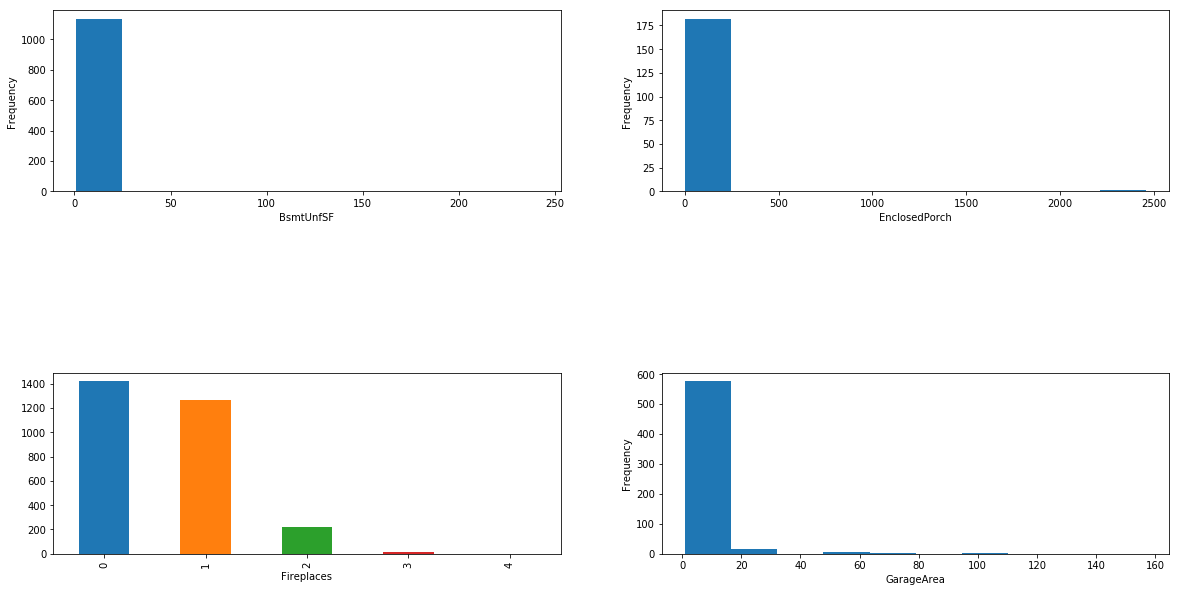

In [9]:
plt.figure(figsize =(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["BsmtUnfSF"].value_counts().plot(kind = "hist")
plt.xlabel("BsmtUnfSF")

plt.subplot(222)
data1["EnclosedPorch"].value_counts().plot(kind = "hist")
plt.xlabel("EnclosedPorch")

plt.subplot(223)
data1["Fireplaces"].value_counts().plot(kind = "bar")
plt.xlabel("Fireplaces")



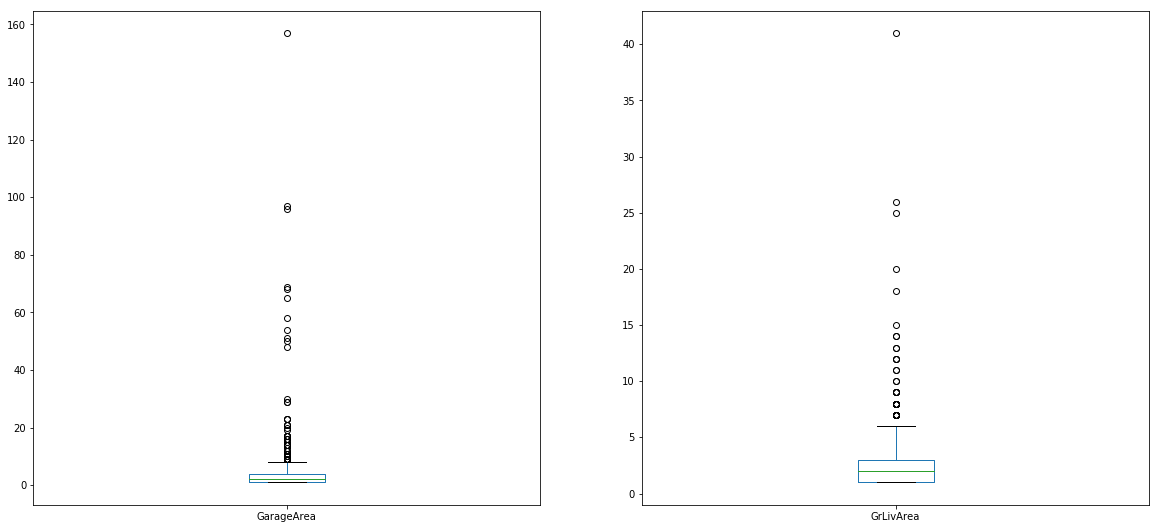

In [17]:
plt.figure(figsize = (20,20))

plt.subplot(221)
data1["GarageArea"].value_counts().plot(kind = "box") #outliers

plt.subplot(222)
data1["GrLivArea"].value_counts().plot(kind = "box")#outliers

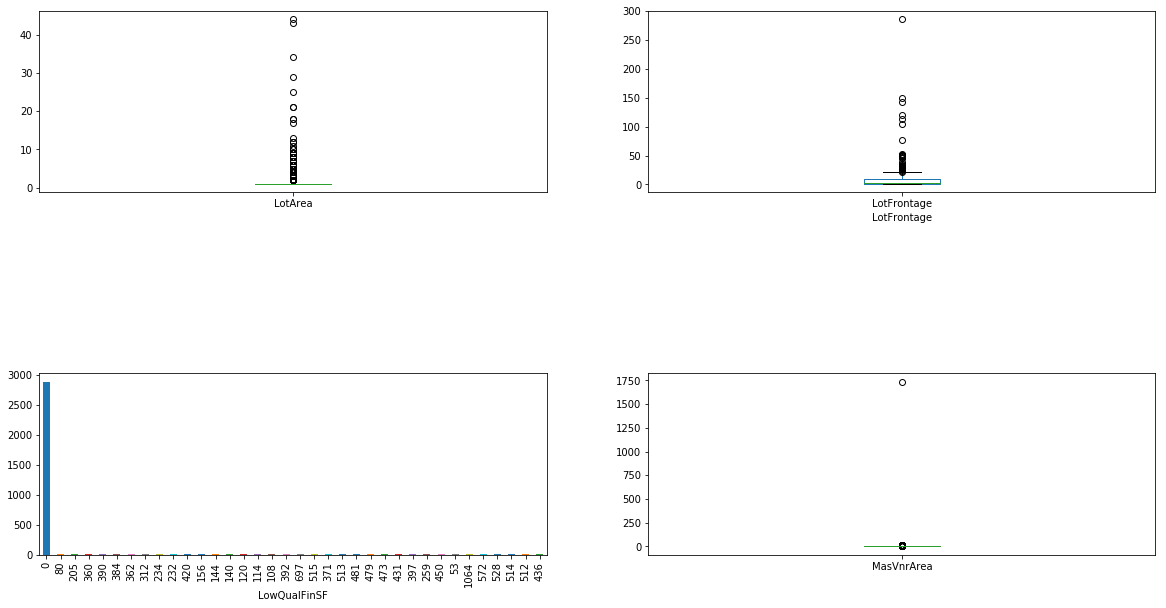

In [29]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["LotArea"].value_counts().plot(kind = "box")

plt.subplot(222)
data1["LotFrontage"].value_counts().plot(kind = "box")
plt.xlabel("LotFrontage")

plt.subplot(223)
data1["LowQualFinSF"].value_counts().plot(kind = "bar")
plt.xlabel("LowQualFinSF")

plt.subplot(224)
data1["MasVnrArea"].value_counts().plot(kind = "box")

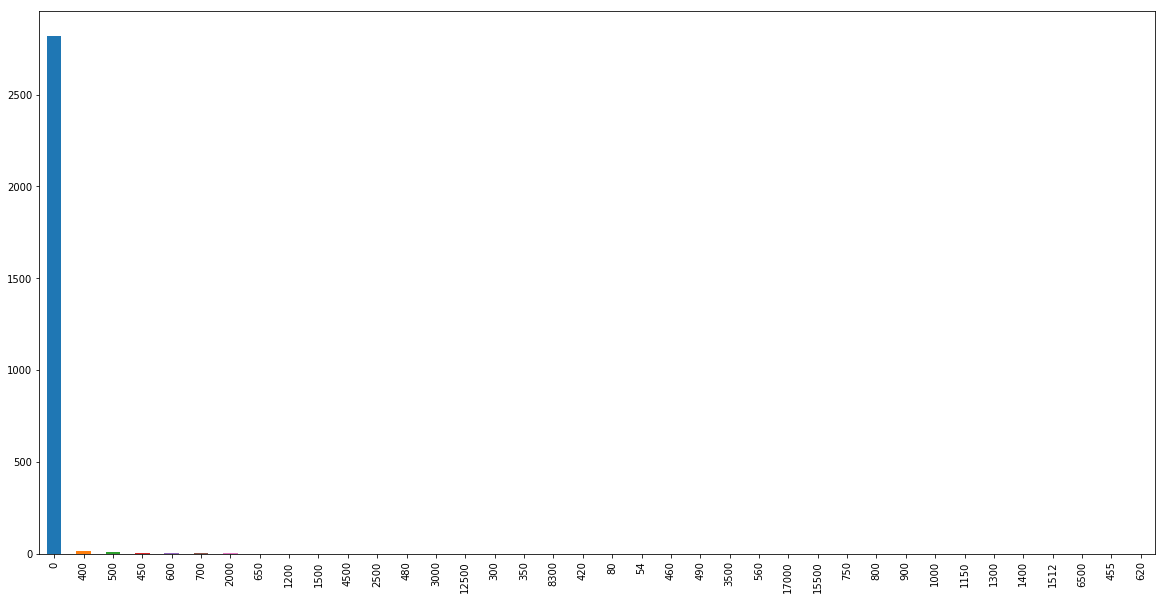

In [54]:
plt.figure(figsize = (20,10))

data1["MiscVal"].value_counts().plot(kind = "bar")

Text(0.5, 0, 'PoolArea')

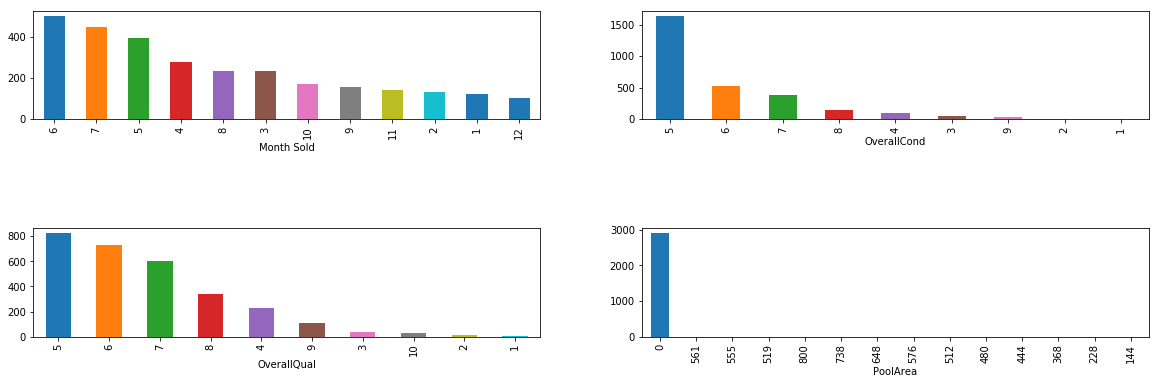

In [44]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(321)
data1["MoSold"].value_counts().plot(kind = "bar")
plt.xlabel("Month Sold")

plt.subplot(322)
data1["OverallCond"].value_counts().plot(kind = "bar")
plt.xlabel("OverallCond")

plt.subplot(323)
data1["OverallQual"].value_counts().plot(kind = "bar")
plt.xlabel("OverallQual")

plt.subplot(324)
data1["PoolArea"].value_counts().plot(kind = "bar")
plt.xlabel("PoolArea")

Text(0.5, 0, 'ScreenPorch')

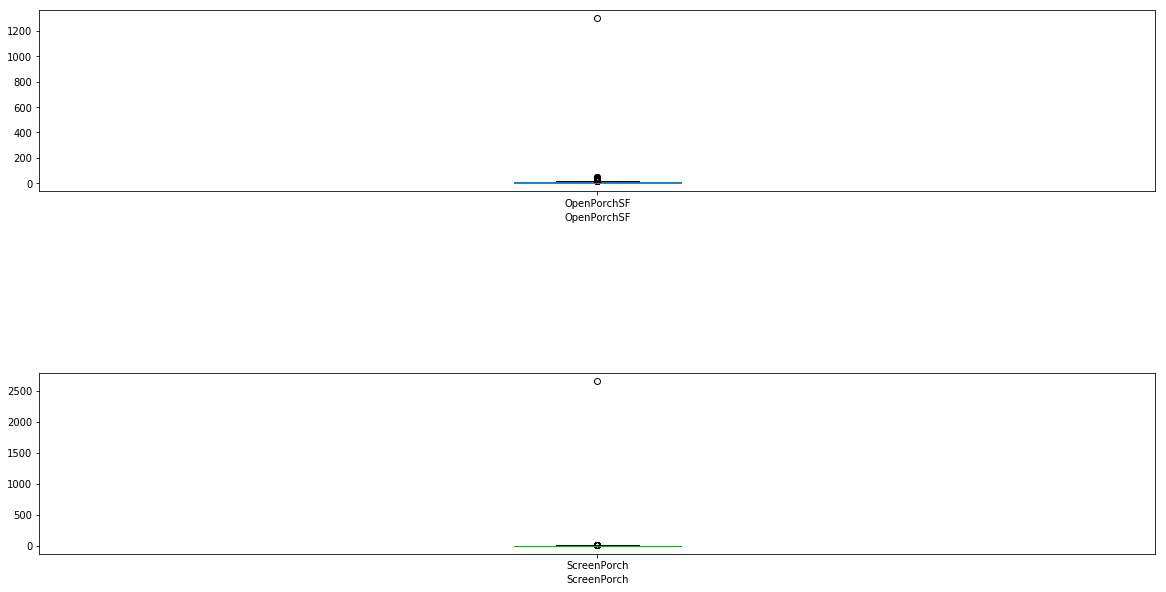

In [43]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(211)
data1["OpenPorchSF"].value_counts().plot(kind = "box")
plt.xlabel("OpenPorchSF")

plt.subplot(212)
data1["ScreenPorch"].value_counts().plot(kind = "box")
plt.xlabel("ScreenPorch")

Text(0.5, 0, 'YearRemodAdd')

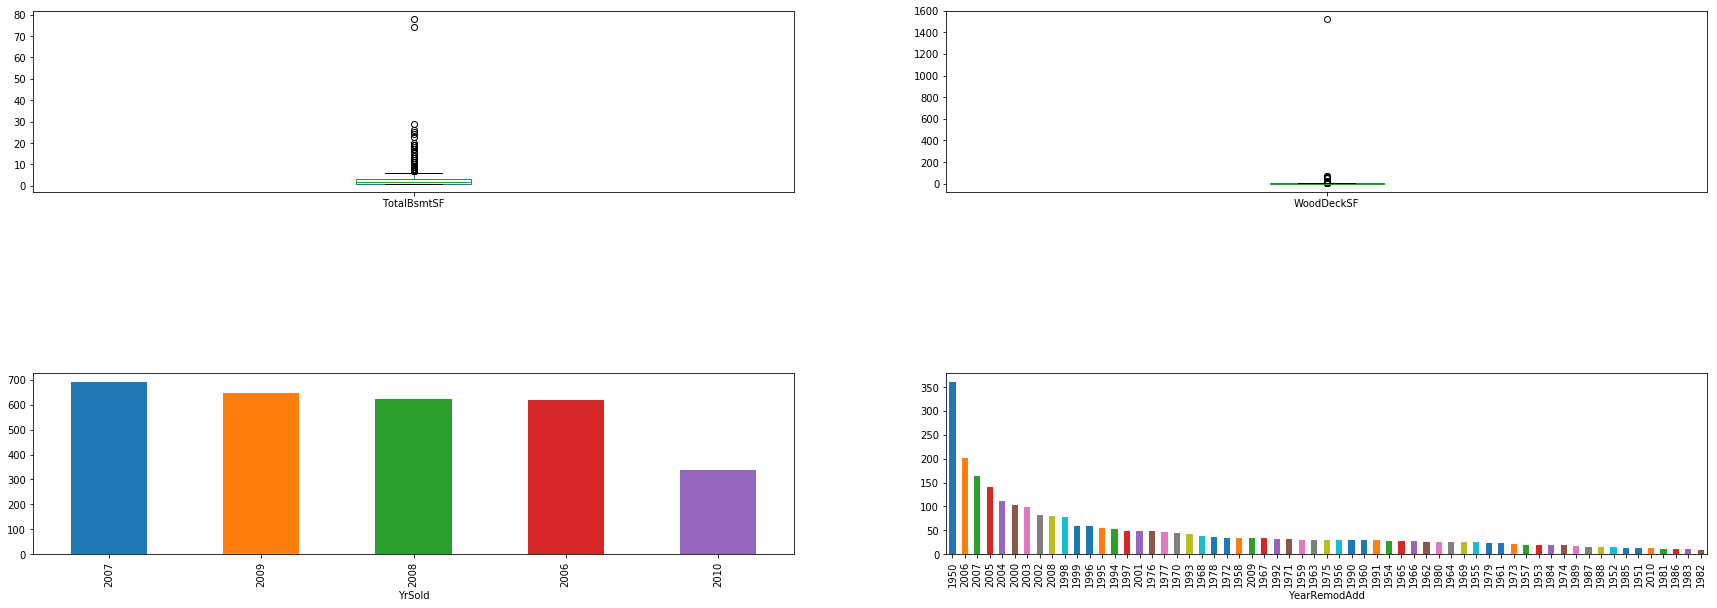

In [52]:
plt.figure(figsize = (30,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["TotalBsmtSF"].value_counts().plot(kind = "box")

plt.subplot(222)
data1["WoodDeckSF"].value_counts().plot(kind = "box")

plt.subplot(223)
data1["YrSold"].value_counts().plot(kind = "bar")
plt.xlabel("YrSold")

plt.subplot(224)
data1["YearRemodAdd"].value_counts().plot(kind = "bar")
plt.xlabel("YearRemodAdd")

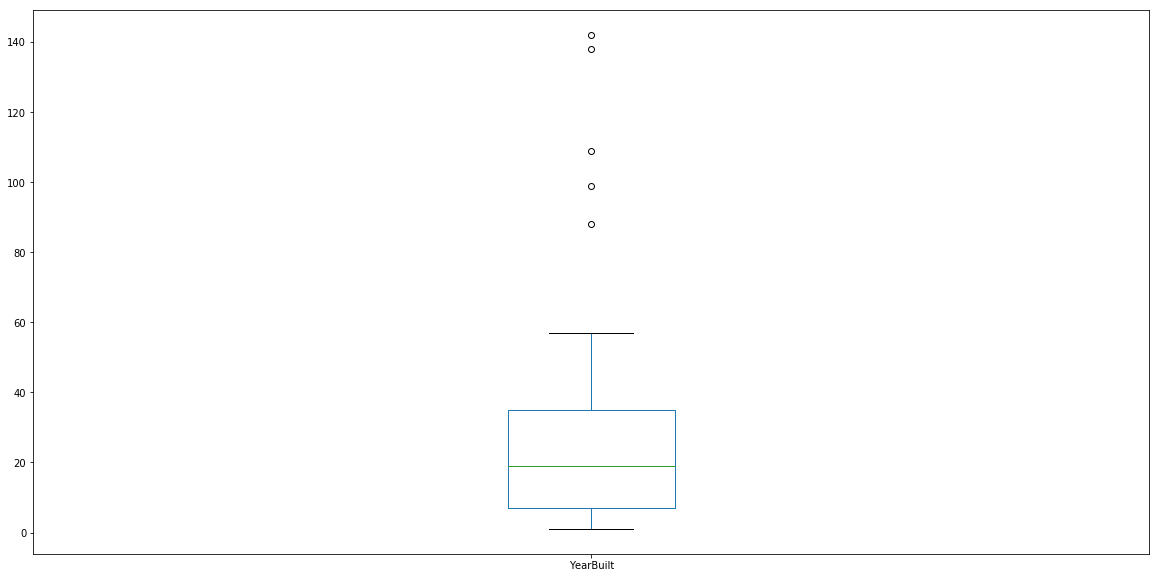

In [55]:
plt.figure(figsize = (20,10))

data1["YearBuilt"].value_counts().plot(kind = "box")

# Bivariate Analysis

In the following cells, we're trying to find out the relationship between the target variable ( SalePrice) and the
other variables present in the data. 
Heatmap has been used for calculating the correlation between SalePrice and other numeric variables.

In [81]:
# calculating pearson correlation 
numeric = ["float64","int64"]
data_numeric = data1.select_dtypes(include = numeric)
data_numeric_corr = data_numeric.corr(method = "pearson")


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [105]:
# creating a heatmap
fig = go.Figure(data = go.Heatmap(z = np.round(data_numeric_corr,2),
                                  x = data_numeric.columns,
                                  y = data_numeric.columns  ))
fig.update_layout(height = 800, width = 800)
fig.show()

#### NEED TO NOTE DOWN THE HIGH CORRELATION VARIABLES AGAINST SALEPRICE

We shall see the relationship between SalePrice(target variable) with non-numeric variales present in the data.

In [50]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses

#from plotly.subplots import make_subplots
#fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]] ,
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))#,
#                 "Plot9","Plot10","Plot11","Plot12",
#                 "Plot13","Plot14","Plot15","Plot16",
#                 "Plot17","Plot18","Plot19"))
                       

fig.add_trace(
    go.Bar(x = data1['BldgType'], y= data1['SalePrice'],
          marker_color = "Violet",marker_line_color="Violet"),
    row = 1, col=1
)


fig.add_trace(
    go.Bar(x = data1['BsmtCond'],y = data1["SalePrice"],
               marker_line_color = "green"),
    row =1,col =2
)

fig.add_trace(
    go.Bar(x = data1['BsmtExposure'],y = data1["SalePrice"],
          marker_line_color = "red"),
    row =1,col = 3
)

fig.add_trace(
    go.Bar(x = data1['BsmtFinType1'],y = data1["SalePrice"],
          marker_color = "lightblue",marker_line_color = "lightblue"),
    row = 1,col=4
)

fig.add_trace(
    go.Bar(x = data1['BsmtFinType2'],y= data1["SalePrice"],
          marker_color = "lightgreen",marker_line_color = "lightgreen"),
    row =2,col=1
)

fig.add_trace(
    go.Bar(x = data1['BsmtQual'],y = data1["SalePrice"],
          marker_color = "indigo",marker_line_color = "indigo"),
    row =2,col=2
)

fig.add_trace(
    go.Bar(x = data1['CentralAir'], y= data1["SalePrice"],
             marker_line_color = "darkgreen"),
    row =2,col =3
)

fig.add_trace(
    go.Bar(x = data1['Condition1'], y= data1["SalePrice"],
              marker_line_color = "lightgreen"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Building Type", row=1,col=1)
fig.update_xaxes(title_text = "Basement Condition", row=1,col=2)
fig.update_xaxes(title_text = "Basement Exposure",row=1,col=3)
fig.update_xaxes(title_text = "Bsmt type1 finished sq.ft.",row=1,col=4)
fig.update_xaxes(title_text = "Bsmt type2 finished sq.ft.",row=2,col=1)
fig.update_xaxes(title_text = "Basement Quality",row=2,col=2)
fig.update_xaxes(title_text = "Central Air Conditioning",row=2,col=3,tickangle =-45)
fig.update_xaxes(title_text = "Main-road/rail Proximity",row=2,col=4,tickangle =-45)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()

In [52]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['Condition2'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['Electrical'],y = data1["SalePrice"],
          marker_color = "pink", marker_line_color = "pink"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['ExterCond'],y= data1["SalePrice"],
          marker_color = "darkblue",marker_line_color = "darkblue"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['ExterQual'],y= data1["SalePrice"],
          marker_color = "crimson",marker_line_color = "crimson"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['Exterior1st'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Exterior2nd'],y= data1["SalePrice"],
             marker_color = "violet", marker_line_color = "violet" ),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['FireplaceQu'],y= data1["SalePrice"],
          marker_line_color = "pink"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['Foundation'],y= data1["SalePrice"],
          marker_color = "chocolate",marker_line_color = "chocolate"),
    row=2,col=4
)
    
# updating x axis properties
fig.update_xaxes(title_text = "2nd Main-road/rail Proximity",row=1,col=1)
fig.update_xaxes(title_text = "Electrical",row=1,col=2)
fig.update_xaxes(title_text = "External Condition",row=1,col=3)
fig.update_xaxes(title_text = "Exterior Quality",row=1,col=4)
fig.update_xaxes(title_text = "Exterior covering",row=2,col=1)
fig.update_xaxes(title_text = "Exterior Covering(if >1)",row=2,col=2)
fig.update_xaxes(title_text = "Fireplace Quality",row=2,col=3)
fig.update_xaxes(title_text = "Foundation",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()

In [55]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['Functional'],y= data1["SalePrice"],
          marker_color = "red",marker_line_color = "red"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['GarageCond'],y= data1["SalePrice"],
          marker_color = "orange",marker_line_color = "orange"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['GarageFinish'],y= data1["SalePrice"],
          marker_color = "violet",marker_line_color = "violet"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['GarageQual'],y= data1["SalePrice"],
          marker_color = "green",marker_line_color = "green"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['GarageType'],y= data1["SalePrice"],
          marker_line_color = "turquoise"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Heating'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['HeatingQC'],y= data1["SalePrice"],
          marker_line_color = "lightgreen"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['HouseStyle'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=2,col=4
)
# updating x axis properties
fig.update_xaxes(title_text = "Functional",row=1,col=1)
fig.update_xaxes(title_text = "Garage Condition",row=2,col=2)
fig.update_xaxes(title_text = "Garage Finish",row=2,col=3)
fig.update_xaxes(title_text = "Garage Quality",row=2,col=4)
fig.update_xaxes(title_text = "Garage Type",row=2,col=1)
fig.update_xaxes(title_text = "Heating",row=2,col=2)
fig.update_xaxes(title_text = "Heating Quality",row=2,col=3)
fig.update_xaxes(title_text = "House Style",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()

In [54]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['KitchenQual'],y= data1["SalePrice"],
          marker_color = "violet",marker_line_color = "violet"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['LandContour'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['LandSlope'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['LotConfig'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['LotShape'],y= data1["SalePrice"],
          marker_line_color = "violet"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['MSZoning'],y= data1["SalePrice"],
          marker_line_color = "burlywood"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['MasVnrType'],y= data1["SalePrice"],
          marker_line_color = "greenyellow"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['Neighborhood'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Kitchen Quality",row=1,col=1)
fig.update_xaxes(title_text = "Land Contour",row=1,col=2)
fig.update_xaxes(title_text = "Land Slope",row=1,col=3)
fig.update_xaxes(title_text = "Lot Configuration",row=1,col=4)
fig.update_xaxes(title_text = "Lot Shape",row=2,col=1)
fig.update_xaxes(title_text = "General Zone Classification",row=2,col=2)
fig.update_xaxes(title_text = "Masonry Veener Type",row=2,col=3)
fig.update_xaxes(title_text = "Neighborhood",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()

In [ ]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['PavedDrive'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['RoofMatl'],y= data1["SalePrice"],
          marker_line_color = "violet"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['RoofStyle'],y= data1["SalePrice"],
          marker_line_color = "purple"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['SaleCondition'],y= data1["SalePrice"],
          marker_line_color = "rosybrown"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['SaleType'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Street'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['Utilities'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['BedroomAbvGr'],y= data1["SalePrice"],
          marker_line_color = "purple"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Paved Drive",row=1,col=1)
fig.update_xaxes(title_text = "Roof Material",row=1,col=2)
fig.update_xaxes(title_text = "Roof Style",row=1,col=3)
fig.update_xaxes(title_text = "Sale Condition",row=1,col=4)
fig.update_xaxes(title_text = "Sale Type",row=2,col=1)
fig.update_xaxes(title_text = "Street",row=2,col=2)
fig.update_xaxes(title_text = "Utilities",row=2,col=3)
fig.update_xaxes(title_text = "No. of Bedrooms",row=2,col=4)


fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()

In [24]:
# heatmap
numeric = ["float64","int64"]
num_columns = data.select_dtypes(include = numeric)
display(num_columns.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [ ]:
#creating heatmaps
import plotly.figure_factory as ff